# Introducción al Análisis Exploratorio de Datos con Pandas

Es un enfoque que comprende un conjunto de tareas para analizar conjuntos de datos para poder encontrar sus principales caracteristicas.

Estas tareas en general comprenden todo lo que tenemos que hacer desde que se formula una pregunta interesante, se reunen los datos y se desarrolla el proceso necesario para **poder responder esa pregunta**.

Su Objetivo es:

- Entender los datos.
- Ver caracteristicas de los datos.
- Detectar irregularidades (outliers) de los datos.
- Obtener valores estadisticos de los datos.
- Realizar visualizaciones rapidas que faciliten el proceso de exploracion.

Usualmente el resultado del mismo suele ser un reporte o un notebook, que reune codigo y visualizaciones para llegar a ciertas **conclusiones o insights**.

Es un proceso iterativo, que se retroalimenta.

En general realizaremos el análisis del mismo sobre uno o varios Dataframes.

## Temario

Estos son algunos de los temas que intentaremos revisar a lo largo del analisis propuesto

- Visualizaciones
    - Examinando la distribucion de una variables
        - Histograma
        - Density Plot
    - Explorando relacion entre variables
        - Overlaid Histogram
        - Scatter Plot
        - Heatmap
    - Comparando Grupos o categorias
        - Bar Plot
        - Grouped Bar Plot
        - Box Plot
    - Recomendaciones generales para visualizacion
- Concatenacion y Join (Merge) de data frames.

In [87]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import datetime as dt
import time as tm
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [88]:
import datetime as dt
import time as tm

# Carga de Datos 

In [89]:
df_edu = pd.read_csv('fiuba_1_postulantes_educacion.csv',  sep= ',', encoding = 'UTF-8')
df_post = pd.read_csv('fiuba_2_postulantes_genero_y_edad.csv',  sep= ',', encoding = 'UTF-8')
df_visitas = pd.read_csv('fiuba_3_vistas.csv',  sep= ',', encoding = 'UTF-8')
df_postu = pd.read_csv('fiuba_4_postulaciones.csv',  sep= ',', encoding = 'UTF-8')
df_avisos = pd.read_csv('fiuba_5_avisos_online.csv',  sep= ',', encoding = 'UTF-8')
df_detalle = pd.read_csv('fiuba_6_avisos_detalle.csv',  sep= ',', encoding = 'UTF-8')


## Visualizacion e informacion descriptiva de los dataset
- aqui intentamos observar a grandes razgos el contenido de cada archivo como asi tambien cantidades, nulos, Q_valores unicos, repeticiones etc

# Educacion del postulante

In [90]:
#Descripcion de la educacion de los postulantes
df_edu.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [91]:
# El dataset esta completo
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


In [92]:
df_edu.describe()
# encontramos que existen 188752 postulantes de los cuales X tienen mas de un registro de educacion

,idpostulante,nombre,estado
count,298231,298231,298231
unique,188752,7,3
top,YlMLGD,Secundario,Graduado
freq,9,110256,194474


In [93]:
# Obtenemos cuales son los postulantes que tienen mas de un grado de educacion
aux_df_educacion = pd.DataFrame(df_edu.idpostulante.value_counts()[df_edu.idpostulante.value_counts() > 1])
aux_df_educacion= aux_df_educacion.reset_index()
aux_df_educacion.columns = ['idpostulante', 'Q_Education']

In [94]:
# Obtenemos cuales son los postulantes que tienen un grado de educacion
aux_df_educacion_1 = pd.DataFrame(df_edu.idpostulante.value_counts()[df_edu.idpostulante.value_counts() == 1])
aux_df_educacion_1= aux_df_educacion_1.reset_index()
aux_df_educacion_1.columns = ['idpostulante', 'Q_Education']


In [95]:
aux_df_educacion_1

,idpostulante,Q_Education
0,X95YmqK,1
1,ERbBw6,1
2,Oqr3GQB,1
3,8M2mom3,1
4,GNZE2ae,1
5,2zQ3kx1,1
6,Yj5jNBX,1
7,8ML482l,1
8,3NPlloQ,1
9,6r5z4xx,1


In [96]:
# son 80276 postulantes con mas de un registro por educacion
aux_df_educacion.shape

(80276, 2)

In [97]:
# Algun Ejemplo
df_edu[df_edu.idpostulante == 'YlMLGD']

,idpostulante,nombre,estado
373,YlMLGD,Terciario/Técnico,En Curso
374,YlMLGD,Otro,En Curso
375,YlMLGD,Universitario,En Curso
2206,YlMLGD,Terciario/Técnico,Graduado
2207,YlMLGD,Universitario,Graduado
2208,YlMLGD,Otro,Graduado
2209,YlMLGD,Posgrado,Graduado
3659,YlMLGD,Universitario,Abandonado
3660,YlMLGD,Terciario/Técnico,Abandonado


In [98]:
df_edu[df_edu.idpostulante == 'EZD29']

,idpostulante,nombre,estado
12,EZD29,Universitario,En Curso
13,EZD29,Terciario/Técnico,En Curso
14,EZD29,Otro,En Curso
749,EZD29,Terciario/Técnico,Graduado
750,EZD29,Universitario,Graduado
751,EZD29,Posgrado,Graduado
752,EZD29,Otro,Graduado
3399,EZD29,Universitario,Abandonado


In [99]:
grf1 = df_edu['estado'].value_counts()
grf2 = df_edu['nombre'].value_counts()


- agrupamos nombre y estado

In [100]:
educ = df_edu.groupby(['nombre','estado'], as_index= False ).count()\
        .sort_values(by ='idpostulante', ascending = False)
    
educ.columns = ['nombre', 'estado', 'cantidad']

In [101]:
educ["concat"] = educ.nombre +' - ' +  educ.estado

In [102]:
educ

,nombre,estado,cantidad,concat
14,Secundario,Graduado,103105,Secundario - Graduado
19,Universitario,En Curso,50733,Universitario - En Curso
20,Universitario,Graduado,38607,Universitario - Graduado
17,Terciario/Técnico,Graduado,27009,Terciario/Técnico - Graduado
8,Otro,Graduado,18882,Otro - Graduado
16,Terciario/Técnico,En Curso,15032,Terciario/Técnico - En Curso
18,Universitario,Abandonado,14955,Universitario - Abandonado
15,Terciario/Técnico,Abandonado,5692,Terciario/Técnico - Abandonado
7,Otro,En Curso,4919,Otro - En Curso
11,Posgrado,Graduado,4831,Posgrado - Graduado


In [103]:
grf1

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

Text(0,0.5,'Q_Postulantes')

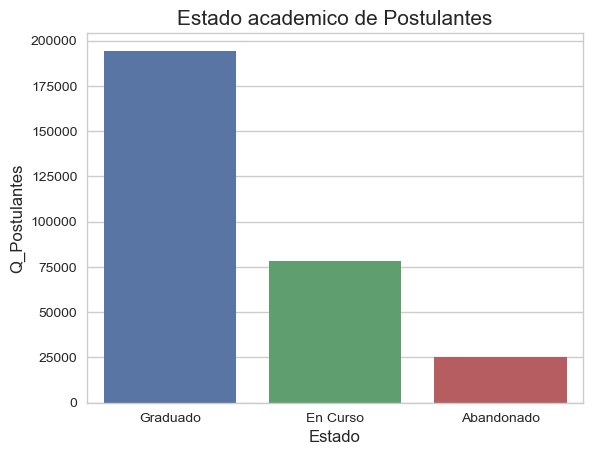

In [104]:
gr = sns.barplot(x= grf1.index, y=grf1.values , orient='v')
gr.set_title("Estado academico de Postulantes", fontsize=15)
gr.set_xlabel("Estado", fontsize=12)
gr.set_ylabel("Q_Postulantes", fontsize=12)

In [105]:
grf2

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nombre, dtype: int64

Text(0,0.5,'Q_Postulantes')

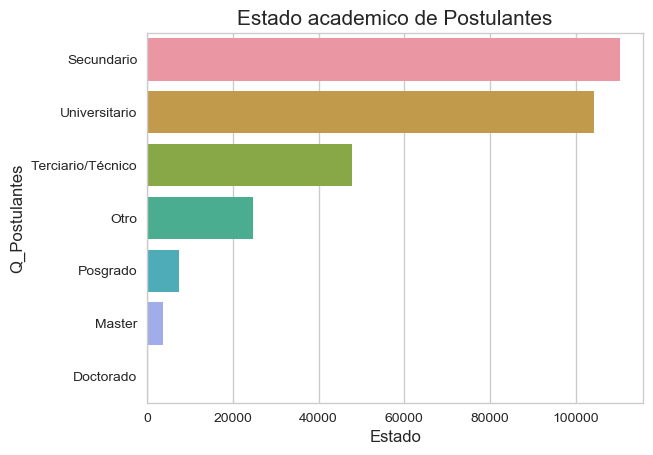

In [106]:
gr = sns.barplot(x=  grf2.values , y= grf2.index , orient='h')
gr.set_title("Estado academico de Postulantes", fontsize=15)
gr.set_xlabel("Estado", fontsize=12)
gr.set_ylabel("Q_Postulantes", fontsize=12)

Text(0,0.5,'Estado')

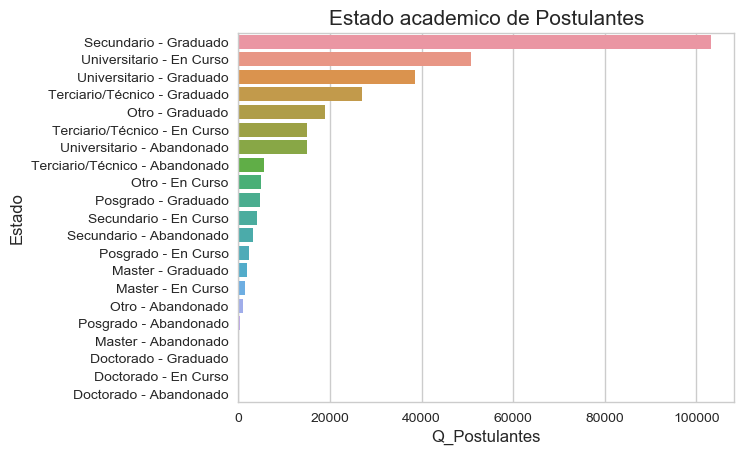

In [107]:
gr = sns.barplot(x= 'cantidad' , y= 'concat' ,  orient='h', data = educ)
gr.set_title("Estado academico de Postulantes", fontsize=15)
gr.set_xlabel("Q_Postulantes", fontsize=12)
gr.set_ylabel("Estado", fontsize=12)

In [108]:
df_edu.merge(aux_df_educacion_1, how='inner', on= 'idpostulante' )

,idpostulante,nombre,estado,Q_Education
0,1d2B,Universitario,En Curso,1
1,6M3jr,Universitario,En Curso,1
2,EpDDJ,Universitario,En Curso,1
3,ex4j2,Universitario,En Curso,1
4,ZPWlE,Universitario,En Curso,1
5,NrlQx,Terciario/Técnico,En Curso,1
6,eaXOE,Universitario,En Curso,1
7,aBeQZ,Terciario/Técnico,En Curso,1
8,8V5RW,Universitario,En Curso,1
9,aBL4W,Universitario,En Curso,1


### Genero y Edad

In [109]:
from datetime import datetime as dt
formato = "%H:%M:%S"

In [110]:
df_post.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [111]:
df_post.describe()

,idpostulante,fechanacimiento,sexo
count,200888,196138,200888
unique,200888,15027,3
top,Y1a1Nr,1994-05-24,FEM
freq,1,57,101981


In [112]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [113]:
df_post.isnull().any()

idpostulante       False
fechanacimiento     True
sexo               False
dtype: bool

In [114]:
print('Porcentaje de Fechas de nacimientos Nulos ', (df_post[(df_post.fechanacimiento.isnull()) == True].shape[0]/df_post.shape[0])*100 \
      , 'total de registros ',  df_post.shape[0] , 'Cantidad de Registros ' , df_post[(df_post.fechanacimiento.isnull()) == True].shape[0] )
# es solo el 2% del total que no tiene edad ni sexo cargado, no es significante la falta del mismo

Porcentaje de Fechas de nacimientos Nulos  2.364501612838995 total de registros  200888 Cantidad de Registros  4750


In [115]:
# imputamos una fecha dummy para aquellos registros que no poseen valores, tambien podriamos haberlos eliminados
df_post.fechanacimiento.fillna('1900/01/01', inplace = True)

In [116]:
fecha = df_post.fechanacimiento.apply(lambda x: dt.strptime(x.replace('-','/'), '%Y/%m/%d'))

In [117]:
df_post.fechanacimiento = fecha 

In [118]:
anio = df_post.fechanacimiento.apply(lambda x: dt.today().year - x.year)

In [119]:
df_post['edad'] = anio 

In [120]:
df_post.edad[df_post.edad < 70 ].value_counts()


27    11925
26    11780
25    11718
24    11570
28    11064
23    10902
22     9944
29     9914
30     9161
21     8525
31     8283
32     7644
33     6673
20     6466
34     5871
35     5447
36     5018
37     4655
38     4189
39     3879
19     3654
40     3379
41     2938
42     2624
43     2368
44     1965
45     1688
46     1566
47     1451
48     1288
49     1088
50      945
51      874
52      748
53      669
54      637
18      581
55      554
56      474
57      449
58      373
59      284
60      234
61      184
62      160
63       96
64       72
65       37
66       30
68       29
67       20
69       12
12        1
Name: edad, dtype: int64

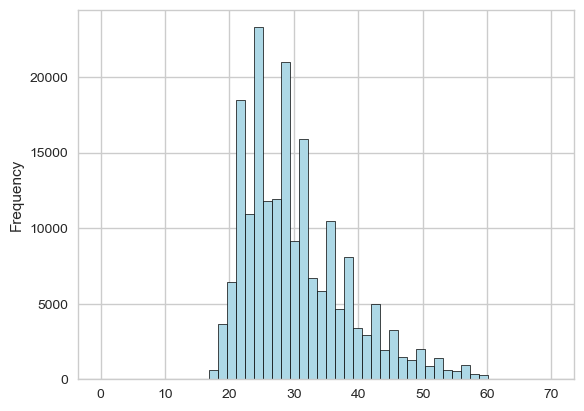

In [121]:
g = df_post.edad[df_post.edad < 60 ].plot.hist(bins=50 , range=(0,70), color='lightblue', edgecolor='black', linewidth=0.5)

Text(0,0.5,'Edades')

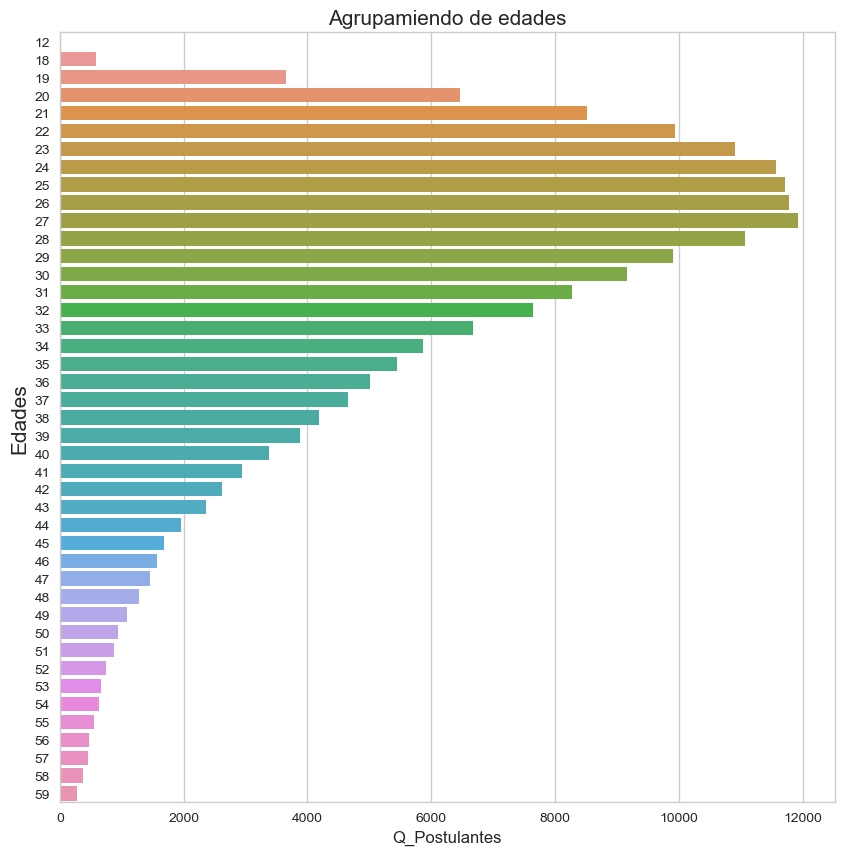

In [122]:
plt.figure(figsize=(10, 10))
gr = sns.barplot(x=df_post.edad[df_post.edad < 60 ].value_counts().values , y=df_post.edad[df_post.edad < 60 ].value_counts().index ,  orient='h')
gr.set_title("Agrupamiendo de edades", fontsize=15)
gr.set_xlabel("Q_Postulantes", fontsize=12)
gr.set_ylabel("Edades", fontsize=15)

# Visita del postulante

In [123]:
df_visitas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [124]:
type(df_visitas.timestamp)

pandas.core.series.Series

In [125]:
#dt.datetime.strptime('2018/02/23', '%Y/%m/%d')
dt.strptime('2018-02-23', '%Y-%m-%d')

datetime.datetime(2018, 2, 23, 0, 0)

In [126]:
fecha1 = df_visitas.timestamp.apply(lambda x: dt.strptime(x.split('T')[0], '%Y-%m-%d'))

In [127]:
df_visitas['fecha'] = fecha1

In [134]:
df_visitas.timestamp[0].split('T')[1]

'13:38:13.187-0500'

In [145]:
#dt.strptime(df_visitas.timestamp[0].split('T')[1],"%H:%M:%S")
hora = df_visitas.timestamp.apply(lambda x: dt.strptime(x.split('T')[1].split('.')[0], "%H:%M:%S"))



In [137]:
df_visitas.timestamp[0].split('T')[1]
#.replace('-','/')

'13:38:13.187-0500'

In [140]:
dt.strptime(df_visitas.timestamp[0].split('T')[0] , '%Y-%m-%d') 

datetime.datetime(2018, 2, 23, 0, 0)

In [148]:
dt.strptime((df_visitas.timestamp[4]), '%Y/%m/%d') 

ValueError: time data '2018-02-23T13:38:18.973-0500' does not match format '%Y/%m/%d'

In [147]:
df_visitas.idAviso.nunique()

7458

In [149]:
# no tiene nulos
df_visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 4 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
fecha           961897 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 29.4+ MB


In [150]:
df_visitas.idAviso.value_counts()
# Claramente existen un subconjunto de Avisos que son los mas visitados
# luego, de estos deberiamos tomar la descripcion

1112363488    4169
1112359836    4120
1112352317    4003
1112366909    3669
1112355872    3472
1112344973    3299
1112369306    3236
1112346591    2979
1112345900    2841
1112334791    2817
1112364849    2768
1112359880    2659
1112316288    2638
1112354099    2609
1112200601    2532
1112340866    2517
1112337868    2467
1112349037    2444
1112361693    2436
1112206678    2396
1112364754    2376
1112361175    2309
1112347174    2274
1112361527    2274
1112366913    2250
1112360679    2211
1112363083    2201
1112359300    2175
1112351629    2160
1112368053    2064
              ... 
1112279512       1
1112342094       1
1112278050       1
1112087794       1
1112341811       1
1111884027       1
1112226998       1
1111649574       1
1112159383       1
1112105024       1
1112206182       1
17903700         1
1111786490       1
1112296027       1
1112341750       1
1111496554       1
1112239042       1
1111263480       1
1112131226       1
1112249371       1
1111267132       1
1111645593  

# Avisos


In [151]:
df_avisos.nunique()

idaviso    5028
dtype: int64

In [152]:
df_avisos.shape

(5028, 1)

# Postulaciones de Candidatos

In [153]:
df_postu.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [154]:
df_postu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB


In [155]:
df_postu.isnull().any()

idaviso             False
idpostulante        False
fechapostulacion    False
dtype: bool

In [156]:
df_postu.idaviso.nunique()

12692

# Destalle

In [157]:
df_detalle.head(100
               )

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL
5,1001135716,1,Vendedor Viajante TUCUMAN/SANTIAGO DEL ESTERO,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A
6,1001326344,1,Vendedor Viajante RECONQUISTA/AVELLANEDA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A
7,1001455648,1,Vendedor Viajante PILAR / ESCOBAR/TIGRE,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Ventas,Wurth Argentina S.A
8,9240880,1,"Productores Asesores Independiente, para venta...",Agente\r\noficial Selecciona:</span></strong><...,Capital Federal,Buenos Aires,NaN,Full-time,Jefe / Supervisor / Responsable,Comercial,Agencia Oficial Alejandro Arizaga
9,1001202662,1,"promotor/a , asesor/a",<p>En Cerantola nos encontramos en la busqueda...,Gran Buenos Aires,NaN,NaN,Full-time,Otro,Atención al Cliente,cerantola


In [158]:
pd.options.display.max_colwidth = 0

In [159]:
df_detalle.head(2)

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,"<p><strong><strong>Empresa:</strong></strong> Distribuidor de repuestos automotor, Importador y Distribuidor de correas agrícolas, industriales y automotor en Argentina</p><p><strong><strong>Sexo Postulante:</strong></strong> Indistinto</p><p><strong><strong>Área:</strong></strong> Ventas</p><p><strong><strong>País/Ciudad:</strong></strong> Argentina, Rosario y Santa Fe</p><p><strong><strong>Industria:</strong></strong> Automotriz</p><p><strong><strong>Salario: </strong></strong>Comisión sobre ventas</p><p><strong><strong>Vacantes:1</strong></strong></p><p><strong><strong>Tipo de puesto de trabajo:</strong></strong> Full-time</p><p>Nuestra empresa es distribuidora mayorista de repuestos para automotor. Importamos y distribuímos correas agrícolas e industriales</p><p>Buscamos un representante de ventas para la provincia de Santa Fe: Rosario y Gran Rosari, ciudad de Santa Fe y zona de influencia.</p><p><br />Requisitos:</p><p>Secundario completo (excluyente)<br />Dedicación full time<br />Experiencia en ventas<br />Buena presencia<br />Movilidad propia<br />Domicilio en la zona<br />Conocimiento del ramo<br /><br />Ofrecemos:</p><p>Comisiones sobre ventas.<br />Capacitación<br />Cartera de clientes<br />Fuerte apoyo logístico</p><p> </p><p> </p>",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,"<p>Solicitamos para importante cadena de farmacias de la Zona Oeste, ENFERMERAS con experiencia, para atención en Vacunatorio.</p><p>Requisitos</p><ul><li>Sexo femenino, de 23 a 45 años.</li><li>Resida z/Oeste (excluyente)</li><li>Experiencia mínima de 3 años (preferentemente en vacunatorios)</li><li>Poseer título y matrícula habilitante</li><li>Disponibilidad horaria</li></ul>",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste


In [160]:
df_detalle.idaviso.nunique()

13534

In [161]:
# Los campos Ciudad y mapacalle son despreciables. Estan completos en menos de un 10% 
df_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB
